# İş Problemi
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli
geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi
ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Veri Seti Hikayesi
Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
gösterir.



# Değişkenler
- CustomerId : Müşteri İd’si
- Gender : Cinsiyet
- SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
- Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
- Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
- tenure : Müşterinin şirkette kaldığı ay sayısı
- PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
- MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
- InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
- OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
- TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
- StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
- StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
- Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
- PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
- PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
- MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
- TotalCharges : Müşteriden tahsil edilen toplam tutar
- Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler


- Her satır benzersiz bir müşteriyi temsil etmekte.
- Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
- Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
- Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import torch

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Görev 1  Keşifçi Veri Analizi
**Adım 1** - Numerik ve kategorik değişkenleri yakalayınız


In [3]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit


def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False


def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)


Observations: 7043
Variables: 21
catCols: 17
numCols: 2
catButCar: 2
numButCat: 1


In [4]:
pd.to_numeric(df["TotalCharges"], errors='ignore').dtype

dtype('O')

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [6]:
catCols, numCols, catButCar = grabColNames(df)

Observations: 7043
Variables: 21
catCols: 17
numCols: 3
catButCar: 1
numButCat: 1


In [8]:
numCols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.


        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################


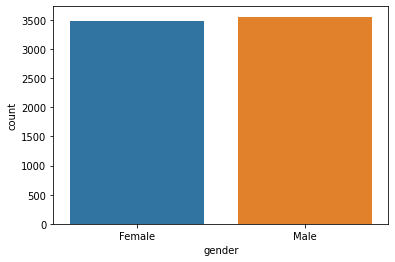

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################


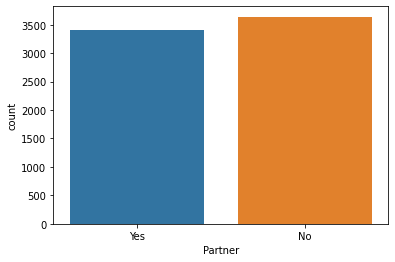

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################


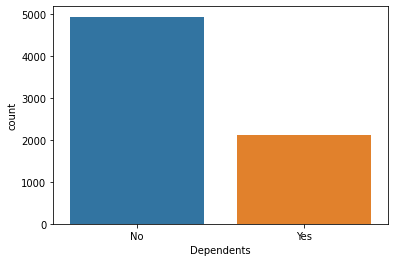

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################


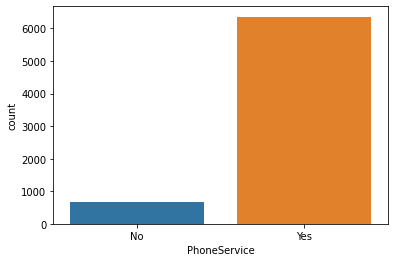

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


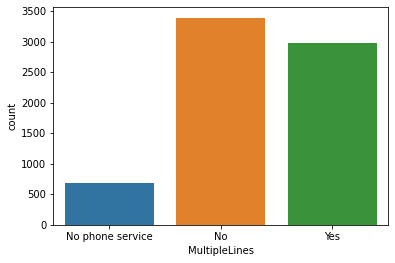

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################


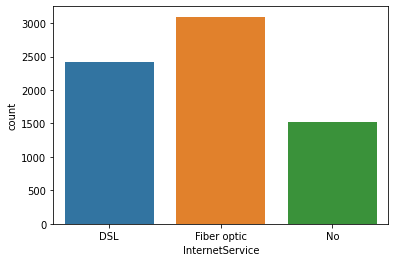

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


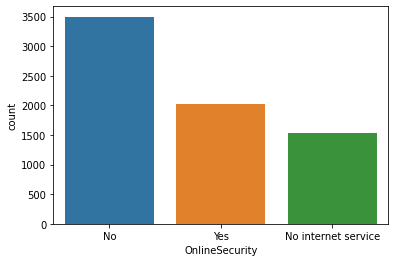

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


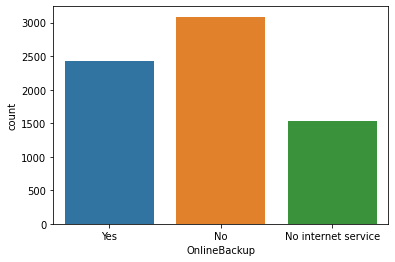

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


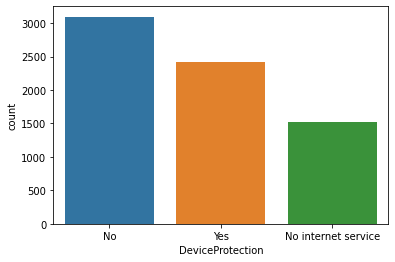

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


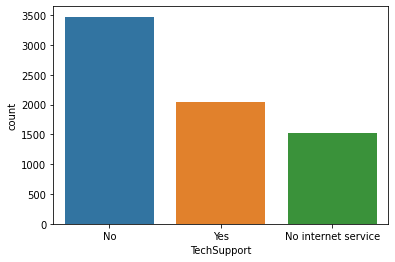

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


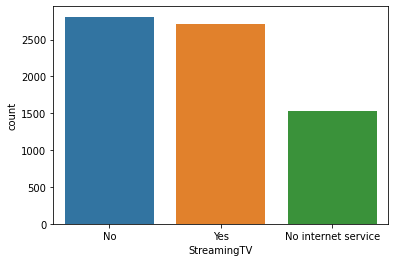

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


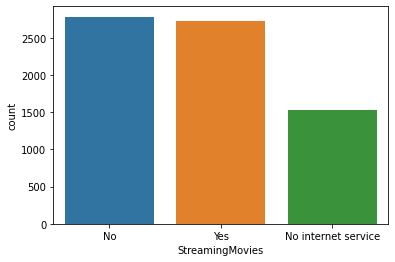

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


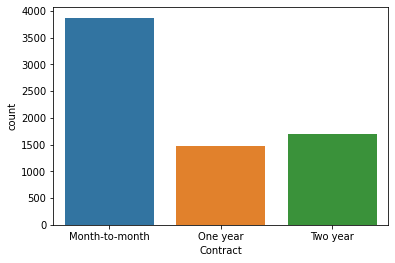

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################


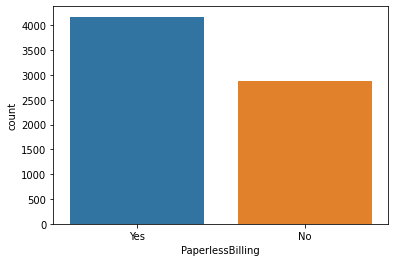

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


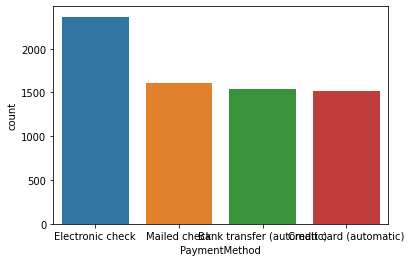

   Churn  Ratio
0   5174 73.463
1   1869 26.537
##########################################


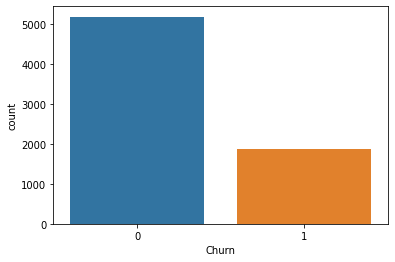

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################


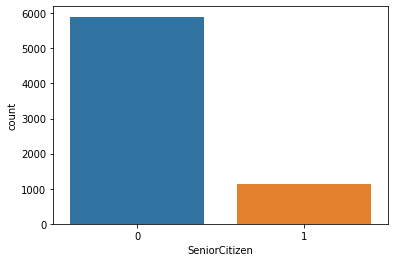

In [10]:
def catSummary(dataframe, colName, plot=False):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)
    
for col in catCols:
    catSummary(df, col, plot=True)

Numerik Değişkenlerin Analizi

tenure:
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
100%      72.000
max       72.000
Name: tenure, dtype: float64


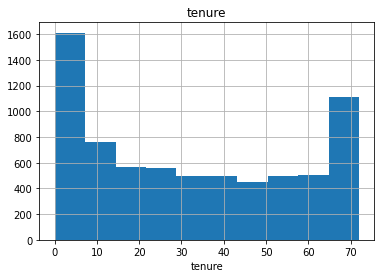

MonthlyCharges:
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
100%     118.750
max      118.750
Name: MonthlyCharges, dtype: float64


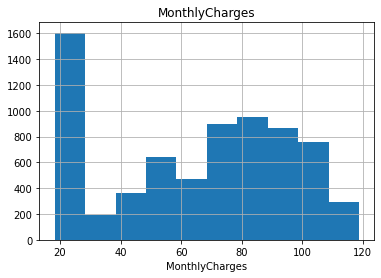

TotalCharges:
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
100%    8684.800
max     8684.800
Name: TotalCharges, dtype: float64


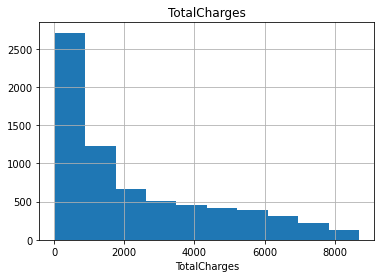

In [11]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)
    
    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)

for col in numCols:
    print(f"{col}:")
    numSummary(df, col, True)

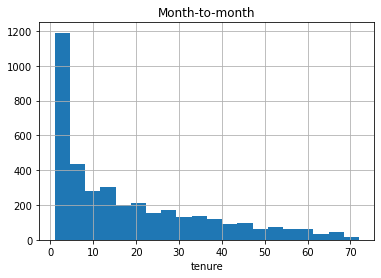

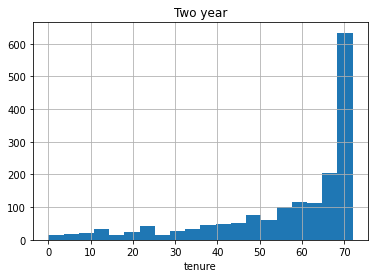

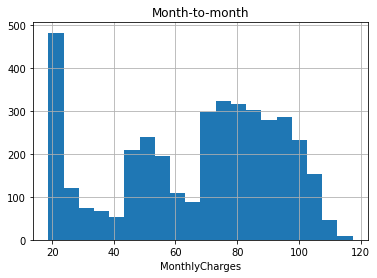

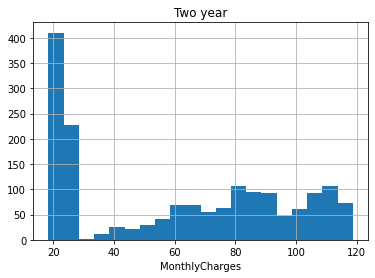

60.77041297935103

In [12]:
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

# MonthyChargers'a bakıldığında aylık sözleşmesi olan müşterilerin aylık ortalama ödemeleri daha fazla olabilir.
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.show()

# 66.39849032258037
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].mean()

df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.show()

# 60.770412979351
df[df["Contract"] == "Two year"]["MonthlyCharges"].mean()


Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)


In [13]:
def targetSummaryWithCat(dataframe, target, numCol):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(numCol)[target].mean()}), end="\n\n\n")
    
def targetSummaryWithNum(dataframe, target, numCol):
    print(dataframe.groupby(target).agg({numCol: "mean"}), end="\n\n\n")
    


In [14]:
for col in numCols:
    targetSummaryWithNum(df, 'Churn', col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




In [13]:
catCols, numCols, catButCar = grabColNames(df)

Observations: 7043
Variables: 21
catCols: 17
numCols: 3
catButCar: 1
numButCat: 2


In [14]:
def targetSummaryWithCat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in catCols:
    targetSummaryWithCat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No                 0.074   1526 21.667


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667


O

Numerik değişkenlerin hedef değişkene göre analizi

In [15]:
def targetSummaryWithNum(dataframe, target, numericalCol):
    print(dataframe.groupby(target).agg({numericalCol: "mean"}), end="\n\n\n")

for col in numCols:
    targetSummaryWithNum(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




**Adım 5** - Aykırı gözlem analizi yapınız.

In [16]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit

def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False

In [17]:
def replaceWithThresholds(dataframe, colName):
    low, up = outlierThresholds(dataframe, colName)

    dataframe.loc[dataframe[colName] > up, colName] = up
    dataframe.loc[dataframe[colName] < low, colName] = low
    
for col in numCols:
    replaceWithThresholds(df, col)
for col in numCols:
    print(col, checkOutlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


**Adım 6** - Eksik gözlem analizi yapınız.

TotalCharges'taki boş gözlemlere bu noktada herhangi bir aksiyon almıyoruz. Daha sonra özellik çıkarımı yaparken ilgileneceğiz.

In [19]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

# Base Model

Değişkenler üzerinde herhangi bir aksiyon almadan öne base bir model kurarak inceleyelim

In [20]:
dff = df.copy()
catCols = [col for col in catCols if col not in ["Churn"]]
catCols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [21]:
def one_hot_encoder(dataframe, categoricalCols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, catCols, drop_first=True)

In [22]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.950,1889.500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.850,108.150,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,45,42.300,1840.750,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.700,151.650,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [25]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID","TotalCharges"], axis=1)              # TotalCharges içerisinde missing value olduğundan modeli çalıştırdığımızda anlamlı bir değişken olduğu için çalışmayacaktı, sokmadık

models = [('LR', LogisticRegression(random_state=46)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46))
          #,("CatBoost", CatBoostClassifier(verbose=False, random_state=46))
          ]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8014
Auc: 0.8434
Recall: 0.5415
Precision: 0.651
F1: 0.591
########## KNN ##########
Accuracy: 0.7707
Auc: 0.7795
Recall: 0.5169
Precision: 0.5765
F1: 0.5446
########## CART ##########
Accuracy: 0.7363
Auc: 0.6666
Recall: 0.5142
Precision: 0.5044
F1: 0.5088
########## RF ##########
Accuracy: 0.7899
Auc: 0.819
Recall: 0.4858
Precision: 0.6378
F1: 0.5513
########## SVM ##########
Accuracy: 0.7931
Auc: 0.7827
Recall: 0.4596
Precision: 0.659
F1: 0.5407
########## XGB ##########
Accuracy: 0.7872
Auc: 0.8238
Recall: 0.5212
Precision: 0.6185
F1: 0.5652
########## LightGBM ##########
Accuracy: 0.7954
Auc: 0.8366
Recall: 0.5217
Precision: 0.642
F1: 0.5752


# Gorev 2  Feature Engineering

Bu noktada df dataframe'imize geri dönüyoruz

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


**Adım 1** - Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.
Aykırı gözlemimiz yoktu onlarla ilgili aksiyon almamıza gerek yok. Eksik gözleme bu noktada aksiyon alabiliriz.

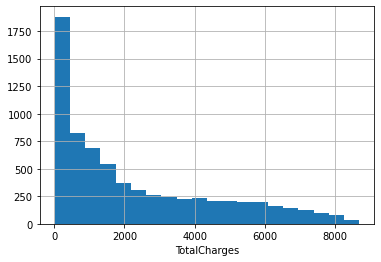

In [27]:
df["TotalCharges"].hist(bins=20)
plt.xlabel("TotalCharges")
plt.show()

In [28]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

**Adım 2** - Yeni değişkenler oluşturunuz



*CustomerTime* değişkeni

Müşterilik süresi ve terk arasındaki ilişkinin grafiksel incelenmesi

Grafiksel olarak incelediğimizde özellikle ilk 12 aydaki terkin daha fazla olduğu, müşterilik süresi arttıkça terk etme durumunun azaldığını yorumlayabiliriz. Bu grafiği incelememiz sonucunda müşterilik aylarını yıl gruplarına çevirerek yeni bir değişken oluşturacağız

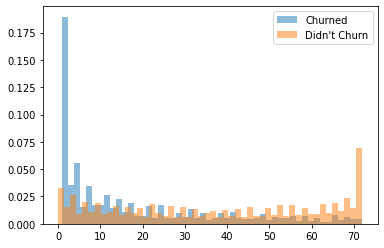

In [29]:
bins = 50
plt.hist(df[df['Churn'] == 1].tenure,
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df[df['Churn'] == 0].tenure,
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()

In [30]:
df.loc[(df['tenure'] <= 12), 'CustomerTime'] = '1year'
df.loc[(df['tenure'] > 12) & (df['tenure'] <= 48), 'CustomerTime'] = '4years'
df.loc[(df['tenure'] > 48), 'CustomerTime'] = '4years+'

df['CustomerTime'].value_counts()

4years     2618
4years+    2239
1year      2186
Name: CustomerTime, dtype: int64

*PaymentMethod_New* değişkeni

Ödeme yöntemlerinde ikisinin çek kullanımı ikisinin de banka ilişkili olmasından kaynaklı 4 grubu 2 ye indirdiğimiz bir değişken oluşturacağız

In [31]:
df.loc[(df['PaymentMethod'] == 'Bank transfer (automatic)') | (df['PaymentMethod'] == 'Credit card (automatic)'), 'PaymentMethod_New'] = 'Bank'
df.loc[(df['PaymentMethod'] == 'Mailed check') | (df['PaymentMethod'] == 'Electronic check'), 'PaymentMethod_New'] = 'Check'

df['PaymentMethod_New'].value_counts()


Check    3977
Bank     3066
Name: PaymentMethod_New, dtype: int64

In [32]:
df.drop('PaymentMethod',axis=1,inplace=True)

*LongTermContract* değişkeni
Kontratı 1 veya 2 yıllık müşterileri daha uzun döneme sahip olduğu için onları bir grup olarak aldığımız bir değişken oluşturalım

In [ ]:
df["LongTermContract"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
df['LongTermContract'].value_counts()

In [ ]:
df.drop('Contract',axis=1,inplace=True)

*MaxPackageInternet* değişkeni 

Interneti varsa ve interneti olduktan sonra satın alabildiği diğer hizmetlerin de hepsine sahipse maximum paketi vardır diyebiliriz. 


InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies

In [35]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [36]:
df.loc[:, "MaxPackageInternet"] = np.where((df["InternetService"] != 'No') & (df["OnlineSecurity"] == 'Yes')
                                               & (df["OnlineBackup"] == 'Yes') & (df["DeviceProtection"] == 'Yes')
                                               & (df["TechSupport"] == 'Yes') & (df["StreamingTV"] == 'Yes') & (df["StreamingMovies"] == 'Yes'), '1','0')

df['MaxPackageInternet'].value_counts()


0    6759
1     284
Name: MaxPackageInternet, dtype: int64

*noSup* değişkeni 

Yan hizmetlerimizden müşteriye destek amaçlı sağladığımız ürünlerin alınıp alınmadığını gösteren değişken oluşturalım 

In [37]:
df["noSup"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)
df['noSup'].value_counts()
                       

1    6317
0     726
Name: noSup, dtype: int64

*TotalServices* değişkeni

Kişinin toplam aldığı servis sayısıı gösteren değişkeni oluşturabiliriz.

In [38]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

df['TotalServices'].value_counts()

1    2253
4    1062
3    1041
2     996
5     827
6     525
7     259
0      80
Name: TotalServices, dtype: int64

*AvgPerMonth* değişkeni

Müşterilerin ortalama aylık ne kadarlık ödeme yapmış olduğunu gösteren bir değişken oluşturabiliriz.

In [39]:
df["AvgPerMonth"] = df["TotalCharges"] / (df["tenure"] + 1)

*CurrentIncrease* değişkeni

Güncel Fiyatın ortalama fiyata göre ne kadar daha fazla olduğunu görmek için bir değişken oluşturabiliriz.

In [40]:
df["CurrentIncrease"] = df["AvgPerMonth"] / df["MonthlyCharges"]

*StreamingService* değişkeni

Yayın ve film akışı olup olmadığını gösteren değişkenlerden herhangi bir akışı olup olmaıdğını gösteren değişken oluşturabiliriz

In [41]:
df["StreamingService"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
df['StreamingService'].value_counts()

0    3544
1    3499
Name: StreamingService, dtype: int64

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CustomerTime,PaymentMethod_New,LongTermContract,MaxPackageInternet,noSup,TotalServices,AvgPerMonth,CurrentIncrease,StreamingService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,29.850,29.850,0,1year,Check,0,0,1,1,14.925,0.500,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,56.950,1889.500,0,4years,Check,1,0,1,3,53.986,0.948,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,53.850,108.150,1,1year,Check,0,0,1,3,36.050,0.669,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,42.300,1840.750,0,4years,Bank,1,0,1,3,40.016,0.946,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,70.700,151.650,1,1year,Check,0,0,1,1,50.550,0.715,0


In [43]:
catCols,numCols, catButCar = grabColNames(df)

Observations: 7043
Variables: 28
catCols: 22
numCols: 5
catButCar: 1
numButCat: 6


**Adım 3** - Encoding işlemlerini gerçekleştiriniz.

Label Encoding

In [44]:
def labelEncoder(dataframe, binaryCol):
    labelencoder = LabelEncoder()
    dataframe[binaryCol] = labelencoder.fit_transform(dataframe[binaryCol])
    return dataframe

binaryCols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binaryCols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'PaymentMethod_New',
 'MaxPackageInternet']

In [45]:
for col in binaryCols:
    df = labelEncoder(df, col)

One Hot Encoding

In [46]:
catCols = [col for col in catCols if col not in binaryCols and col not in ["Churn", "TotalServices"]]

def one_hot_encoder(dataframe, categoricalCols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, catCols, drop_first=True)
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_New,MaxPackageInternet,TotalServices,AvgPerMonth,CurrentIncrease,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,CustomerTime_4years,CustomerTime_4years+,SeniorCitizen_1,LongTermContract_1,noSup_1,StreamingService_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,0,1,14.925,0.500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,1,0,3,53.986,0.948,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,1,0,3,36.050,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,0,0,3,40.016,0.946,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,0,1,50.550,0.715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
df.isnull().sum().sort_values(ascending=False)

customerID                              0
OnlineSecurity_No internet service      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
CustomerTime_4years                     0
CustomerTime_4years+                    0
SeniorCitizen_1                         0
LongTermContract_1                      0
noSup_1                                 0
OnlineSecurity_Yes                      0
InternetService_No                      0
gender                                  0
InternetService_Fiber optic             0
Partner                                 0
Dependents                              0
tenure                            

# Modelleme 

In [48]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [49]:
models = [('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=46))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## KNN ##########
Accuracy: 0.7639
Recall: 0.4521
Precision: 0.5701
F1: 0.5038
########## CART ##########
Accuracy: 0.7228
Recall: 0.5013
Precision: 0.4791
F1: 0.4898
########## RF ##########
Accuracy: 0.7913
Recall: 0.4912
Precision: 0.639
F1: 0.5552
########## SVM ##########
Accuracy: 0.7688
Recall: 0.2798
Precision: 0.6522
F1: 0.3911
########## XGB ##########
Accuracy: 0.7896
Recall: 0.5126
Precision: 0.627
F1: 0.5637
########## LightGBM ##########
Accuracy: 0.7985
Recall: 0.5292
Precision: 0.6486
F1: 0.5823
########## CatBoost ##########
Accuracy: 0.7988
Recall: 0.5137
Precision: 0.6542
F1: 0.5753


Random Forest

In [50]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8],
             "max_features": [3, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [100, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_best_grid.best_score_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [51]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.8003677063185043

In [52]:
cv_results['test_f1'].mean()

0.5662647943829767

In [53]:
cv_results['test_roc_auc'].mean()

0.8430444216985036

XGBoost

In [54]:
xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {"learning_rate": [0.1, 0.001],
                  "max_depth": [5, 8, 20],
                  "n_estimators": [100, 500],
                  "colsample_bytree": [0.5, 0.7]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8029253304319794

In [55]:
cv_results['test_f1'].mean()

0.5842236283574997

In [56]:
cv_results['test_roc_auc'].mean()

0.8427523194380319

LightGBM

In [57]:

lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8023551337846552

In [58]:
cv_results['test_f1'].mean()

0.5694989121897548

In [59]:
cv_results['test_roc_auc'].mean()

0.8457189128774119

CatBoost

In [60]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.8023573500967117

In [61]:
cv_results['test_f1'].mean()

0.5750134800503222

In [62]:
cv_results['test_roc_auc'].mean()

0.8471157489534107

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = xgboost_final.predict(X)
print(confusion_matrix(y, y_pred))

[[4800  374]
 [ 720 1149]]


# Feature Importance

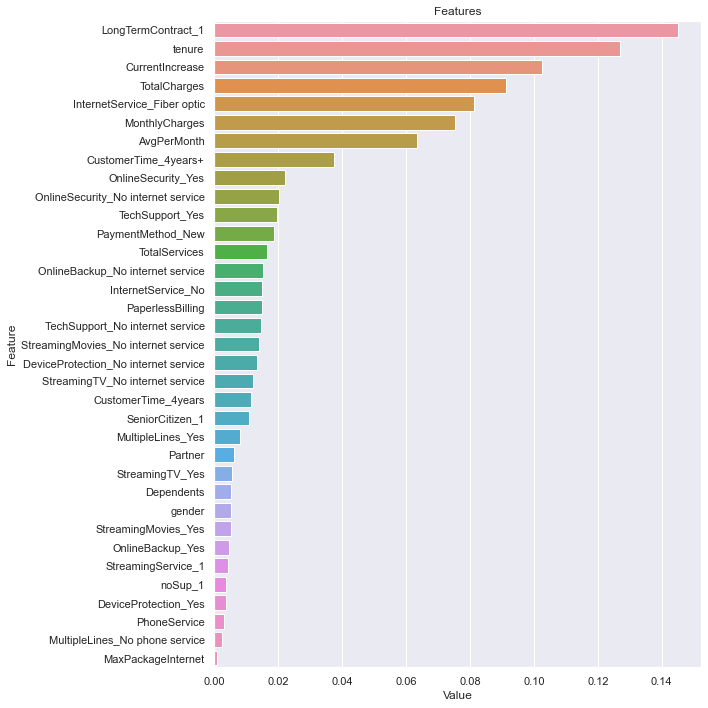

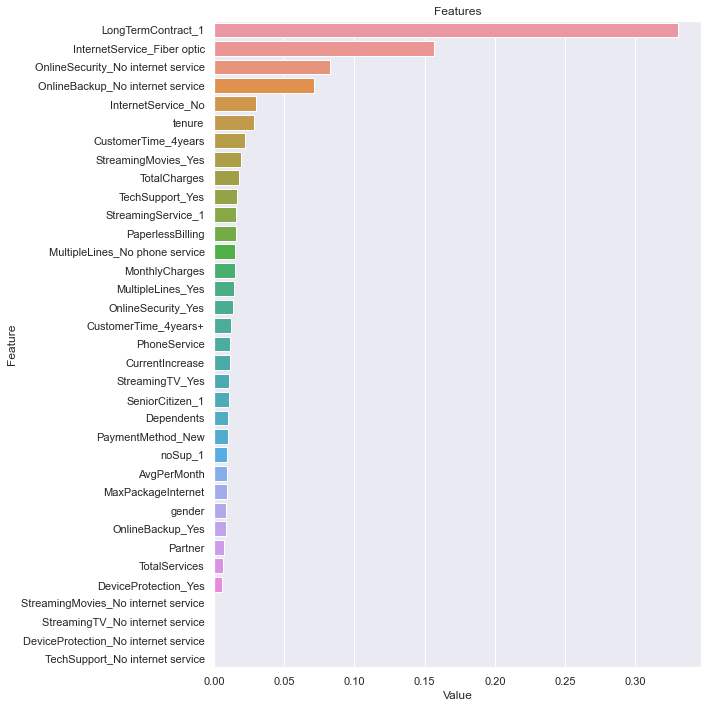

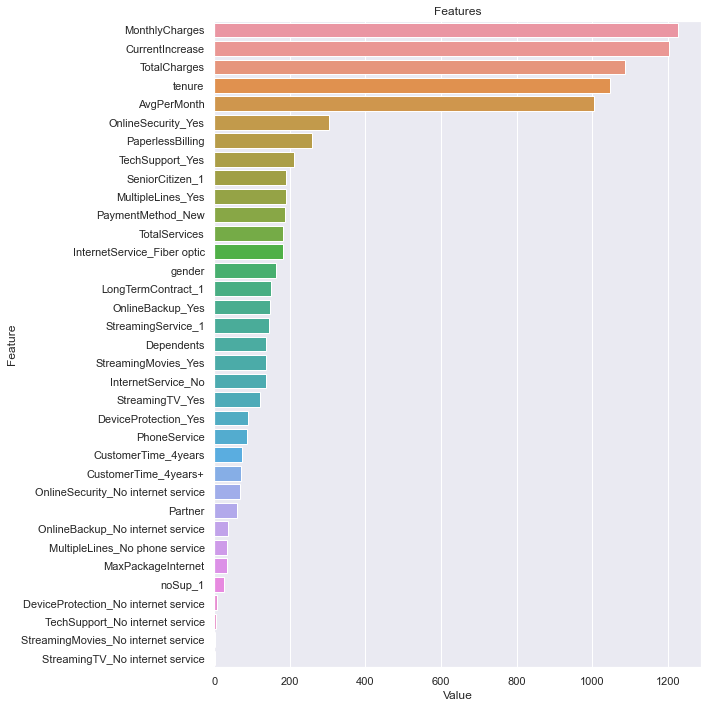

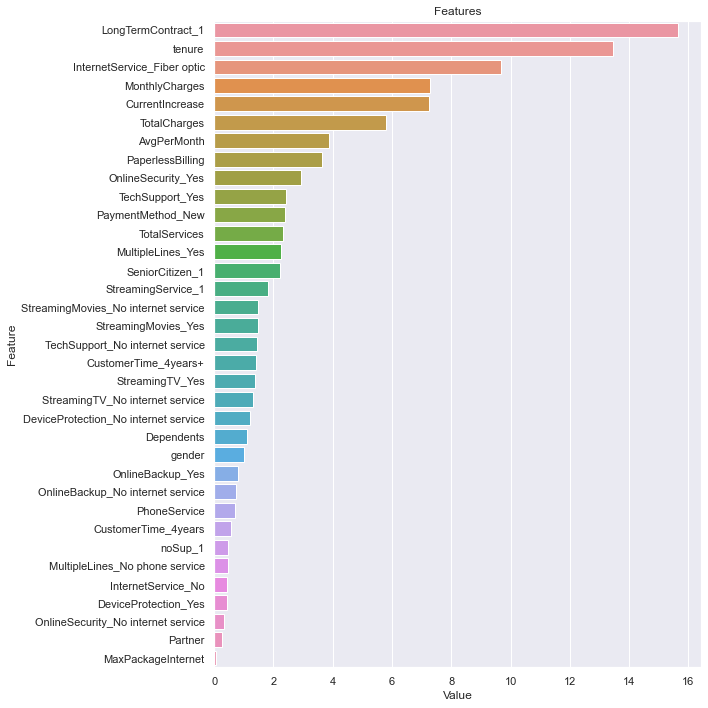

In [64]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)
plot_importance(xgboost_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)